# Section1

### Task 1

In [1]:
import statsmodels.api as sm
import pandas as pd

galton_data = sm.datasets.get_rdataset("Galton", "HistData").data
galton_data.head()

,parent,child
0,70.5,61.7
1,68.5,61.7
2,65.5,61.7
3,64.5,61.7
4,64.0,61.7


### a/.

In [2]:
# Reconstruct the contingency table

# Round heights to the nearest 0.5 ( to match table categories)

# galton_data['parent_rounded'] = galton_data['parent'].round(1)
# galton_data['child_rounded'] = galton_data['child'].round(1)

table = pd.crosstab(galton_data['child'], galton_data['parent'])
table

parent,64.0,64.5,65.5,66.5,67.5,68.5,69.5,70.5,71.5,72.5,73.0
child,,,,,,,,,,,
61.7,1,1,1,0,0,1,0,1,0,0,0
62.2,0,1,0,3,3,0,0,0,0,0,0
63.2,2,4,9,3,5,7,1,1,0,0,0
64.2,4,4,5,5,14,11,16,0,0,0,0
65.2,1,1,7,2,15,16,4,1,1,0,0
66.2,2,5,11,17,36,25,17,1,3,0,0
67.2,2,5,11,17,38,31,27,3,4,0,0
68.2,1,0,7,14,28,34,20,12,3,1,0
69.2,1,2,7,13,38,48,33,18,5,2,0


### b/.

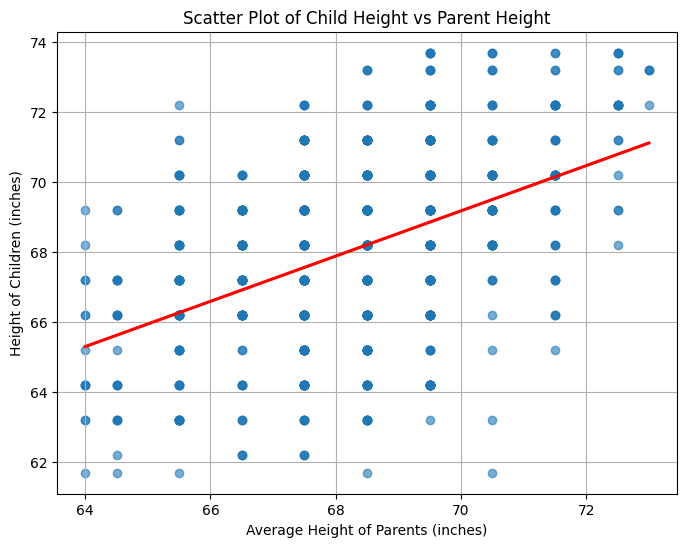

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(data=galton_data,  # regplot: scatter plot with regression line
x='parent', 
y='child', 
ci=None, # no confidence interval, Disables the confidence interval shading around the regression line (for a cleaner look).
line_kws={'color':'red'}, # regression line color
scatter_kws={'alpha':0.6} # transparency for scatter points
)
plt.title("Scatter Plot of Child Height vs Parent Height")
plt.xlabel("Average Height of Parents (inches)")
plt.ylabel("Height of Children (inches)")
plt.grid(True)
plt.show()

In [4]:
import statsmodels.formula.api as smf

# Fit linear regression model
model = smf.ols('child ~ parent', data=galton_data).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  child   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     246.8
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.73e-49
Time:                        09:31:42   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4131.
Df Residuals:                     926   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9415      2.811      8.517      0.0

## Task 2

### Install package in R then import it to python using rpy2(pip install rpy2)

In [5]:
import pandas as pd
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# Import the gamlss.data package
gamlss_data = importr('gamlss.data')

# Load the rent99 dataset
r('data(rent99)')

# Use context manager for conversion (modern approach)
with localconverter(pandas2ri.converter):
    rent99 = r['rent99']
    rent99 = pd.DataFrame(rent99)

# Display info about the dataframe (equivalent to glimpse)
print(rent99.info())
print("\n")
print(rent99.head())

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


<class 'pandas.core.frame.DataFrame'>
Index: 3082 entries, 1 to 3082
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rent      3082 non-null   float64
 1   rentsqm   3082 non-null   float64
 2   area      3082 non-null   int32  
 3   yearc     3082 non-null   float64
 4   location  3082 non-null   int32  
 5   bath      3082 non-null   int32  
 6   kitchen   3082 non-null   int32  
 7   cheating  3082 non-null   int32  
 8   district  3082 non-null   int32  
dtypes: float64(3), int32(6)
memory usage: 168.5+ KB
None


         rent   rentsqm  area   yearc  location  bath  kitchen  cheating  \
1  109.948715  4.228797    26  1918.0         2     1        1         1   
2  243.282043  8.688646    28  1918.0         2     1        1         2   
3  261.641022  8.721369    30  1918.0         1     1        1         2   
4  106.410255  3.547009    30  1918.0         2     1        1         1   
5  133.384613  4.446154    30 

In [6]:
rent99.columns

Index(['rent', 'rentsqm', 'area', 'yearc', 'location', 'bath', 'kitchen',
       'cheating', 'district'],
      dtype='object')

In [7]:
rent99.describe()

,rent,rentsqm,area,yearc,location,bath,kitchen,cheating,district
count,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000
mean,459.437179,7.111259,67.374757,1956.306295,1.443219,1.061973,1.042505,1.895847,1169.715769
std,195.656638,2.436008,23.720446,22.308868,0.545425,0.241145,0.201771,0.305509,677.849333
min,40.512821,0.415800,20.000000,1918.000000,1.000000,1.000000,1.000000,1.000000,113.000000
25%,322.025635,5.260958,51.000000,1939.000000,1.000000,1.000000,1.000000,2.000000,561.000000
50%,426.974350,6.980241,65.000000,1959.000000,1.000000,1.000000,1.000000,2.000000,1025.000000
75%,559.358994,8.840824,81.000000,1972.000000,2.000000,1.000000,1.000000,2.000000,1714.000000
max,1843.384644,17.721611,160.000000,1997.000000,3.000000,2.000000,2.000000,2.000000,2529.000000


In [8]:
rent99['rent']

1        109.948715
2        243.282043
3        261.641022
4        106.410255
5        133.384613
           ...     
3078    1517.948730
3079     358.769226
3080     746.820557
3081     593.948669
3082    1232.205200
Name: rent, Length: 3082, dtype: float64

### a. Reconstruct the histograms and kernel density estimates below.

(1920.0, 2000.0)

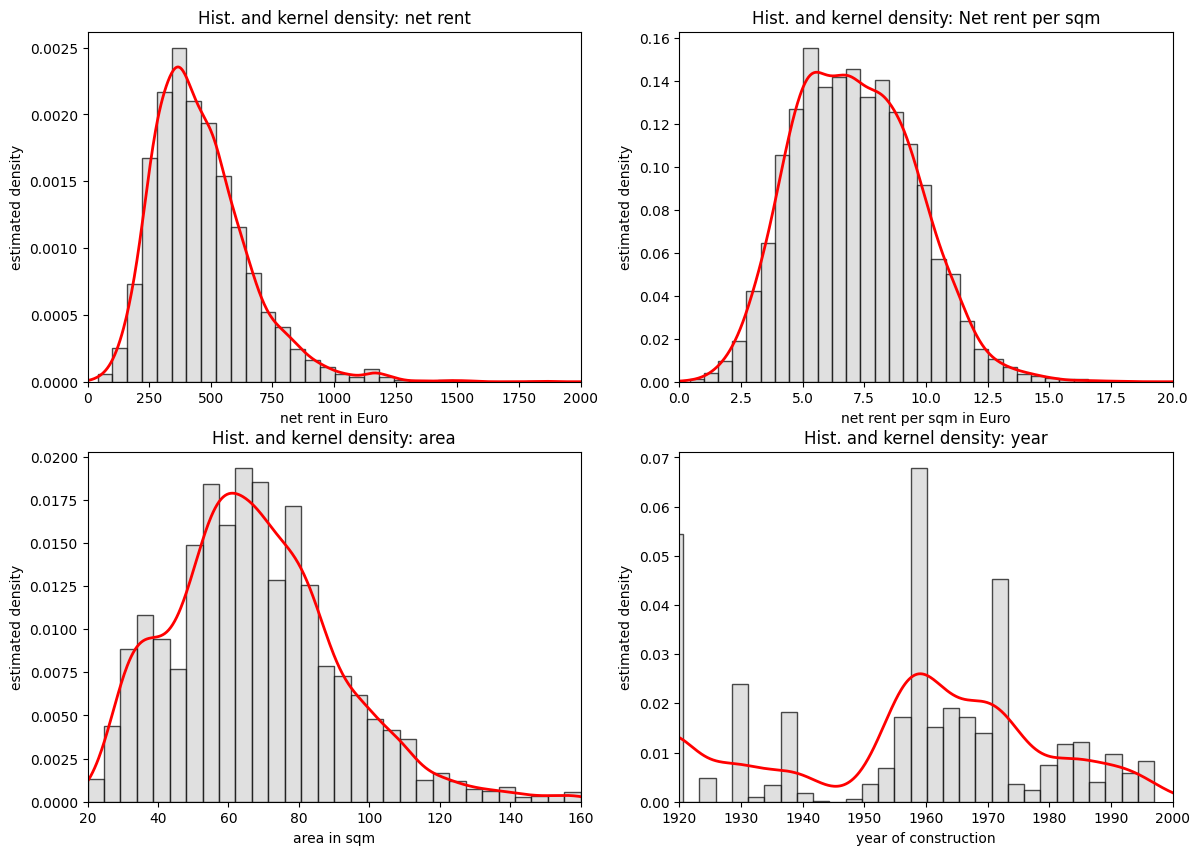

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
'''
axes → is a 2D array containing 4 axes (subplots):

axes[0,0] → top-left

axes[0,1] → top-right

axes[1,0] → bottom-left

axes[1,1] → bottom-right
'''
# 1.Histogram and KDE for rent
ax1 = axes[0, 0]
ax1.hist(rent99['rent'],
          bins=30, #divides the data into 30 intervals
          density=True, #normalizes the histogram so the area = 1 , it shows the probability not raw counts
          alpha=0.7, #transparency level
         edgecolor='black', #black borders
         color='lightgray')
rent99['rent'].plot(kind='kde', ax=ax1, color='red', linewidth=2)#adds a KDE curve (smooth probability density line) in red
ax1.set_xlabel('net rent in Euro')
ax1.set_ylabel('estimated density')
ax1.set_title('Hist. and kernel density: net rent')
ax1.set_xlim(0, 2000)

# 2. Histogram and KDE for net rent per sqm
ax2 = axes[0, 1]
ax2.hist(rent99['rentsqm'], bins=30, density=True, alpha=0.7, 
         edgecolor='black', color='lightgray')
rent99['rentsqm'].plot(kind='kde', ax=ax2, color='red', linewidth=2)
ax2.set_xlabel('net rent per sqm in Euro')
ax2.set_ylabel('estimated density')
ax2.set_title('Hist. and kernel density: Net rent per sqm')
ax2.set_xlim(0, 20)

# 3. Histogram and KDE for area
ax3 = axes[1, 0]
ax3.hist(rent99['area'], bins=30, density=True, alpha=0.7, 
         edgecolor='black', color='lightgray')
rent99['area'].plot(kind='kde', ax=ax3, color='red', linewidth=2)
ax3.set_xlabel('area in sqm')
ax3.set_ylabel('estimated density')
ax3.set_title('Hist. and kernel density: area')
ax3.set_xlim(20, 160)

# 4. Histogram and KDE for year of construction
ax4 = axes[1, 1]
ax4.hist(rent99['yearc'], bins=30, density=True, alpha=0.7, 
         edgecolor='black', color='lightgray')
rent99['yearc'].plot(kind='kde', ax=ax4, color='red', linewidth=2)
ax4.set_xlabel('year of construction')
ax4.set_ylabel('estimated density')
ax4.set_title('Hist. and kernel density: year')
ax4.set_xlim(1920, 2000)

### b. Reconstruct the scatter plots below.

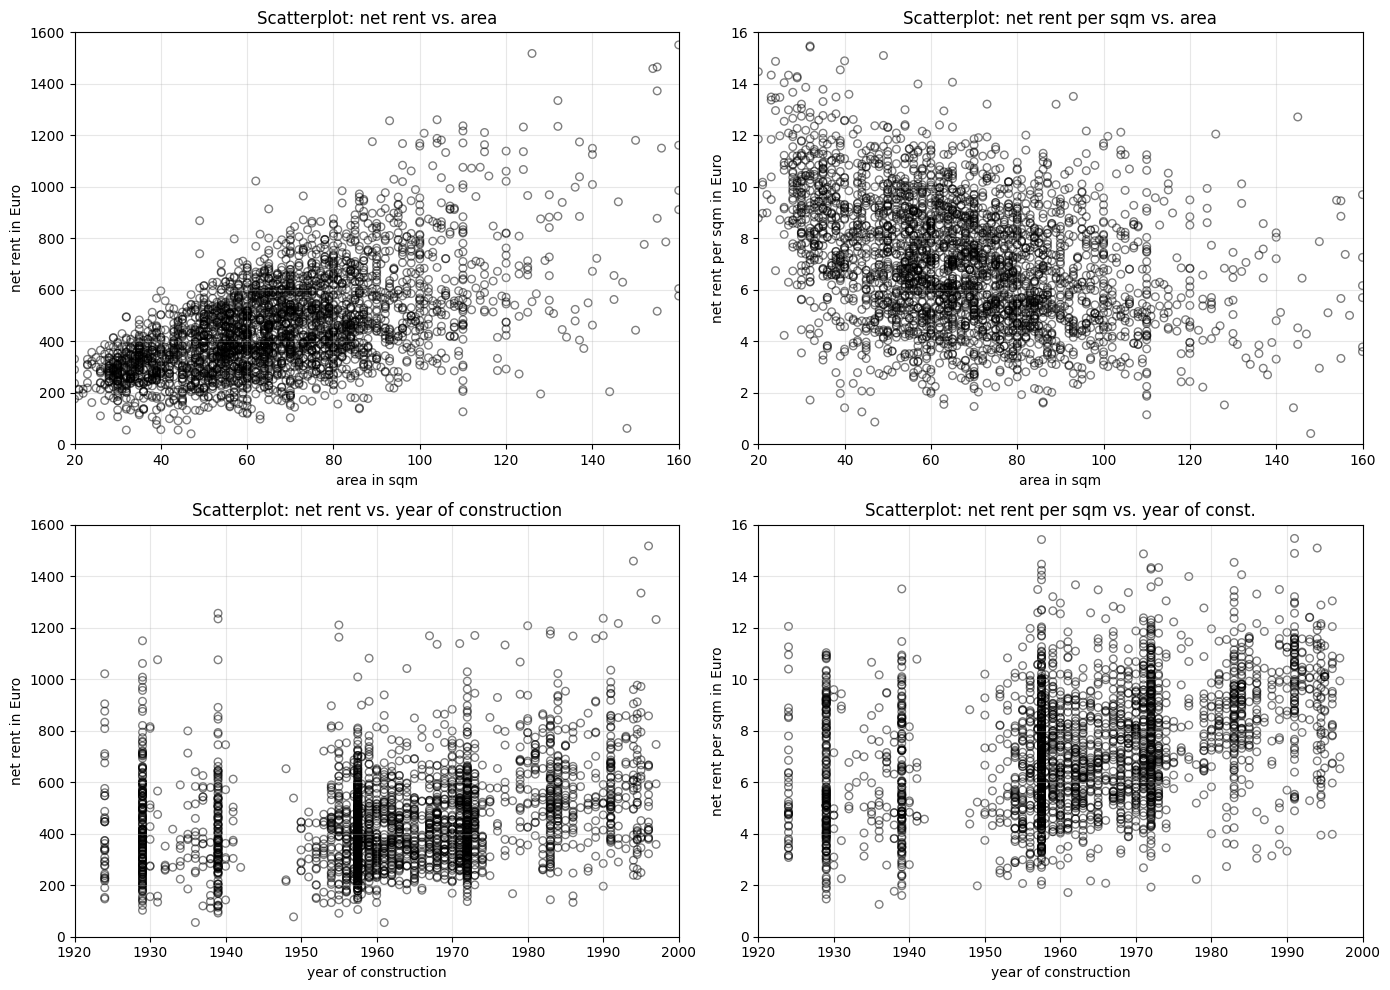

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Scatterplot: net rent vs. area
ax1 = axes[0, 0]
ax1.scatter(rent99['area'], rent99['rent'], alpha=0.5, 
            edgecolors='black', facecolors='none', s=30) #s: size of points
ax1.set_xlabel('area in sqm')
ax1.set_ylabel('net rent in Euro')
ax1.set_title('Scatterplot: net rent vs. area')
ax1.set_xlim(20, 160)
ax1.set_ylim(0, 1600)
ax1.grid(True, alpha=0.3)

# 2. Scatterplot: net rent per sqm vs. area
ax2 = axes[0, 1]
ax2.scatter(rent99['area'], rent99['rentsqm'], alpha=0.5, 
            edgecolors='black', facecolors='none', s=30)
ax2.set_xlabel('area in sqm')
ax2.set_ylabel('net rent per sqm in Euro')
ax2.set_title('Scatterplot: net rent per sqm vs. area')
ax2.set_xlim(20, 160)
ax2.set_ylim(0, 16)
ax2.grid(True, alpha=0.3)

# 3. Scatterplot: net rent vs. year of construction
ax3 = axes[1, 0]
ax3.scatter(rent99['yearc'], rent99['rent'], alpha=0.5, 
            edgecolors='black', facecolors='none', s=30)
ax3.set_xlabel('year of construction')
ax3.set_ylabel('net rent in Euro')
ax3.set_title('Scatterplot: net rent vs. year of construction')
ax3.set_xlim(1920, 2000)
ax3.set_ylim(0, 1600)
ax3.grid(True, alpha=0.3)

# 4. Scatterplot: net rent per sqm vs. year of construction
ax4 = axes[1, 1]
ax4.scatter(rent99['yearc'], rent99['rentsqm'], alpha=0.5, 
            edgecolors='black', facecolors='none', s=30)
ax4.set_xlabel('year of construction')
ax4.set_ylabel('net rent per sqm in Euro')
ax4.set_title('Scatterplot: net rent per sqm vs. year of const.')
ax4.set_xlim(1920, 2000)
ax4.set_ylim(0, 16)
ax4.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()


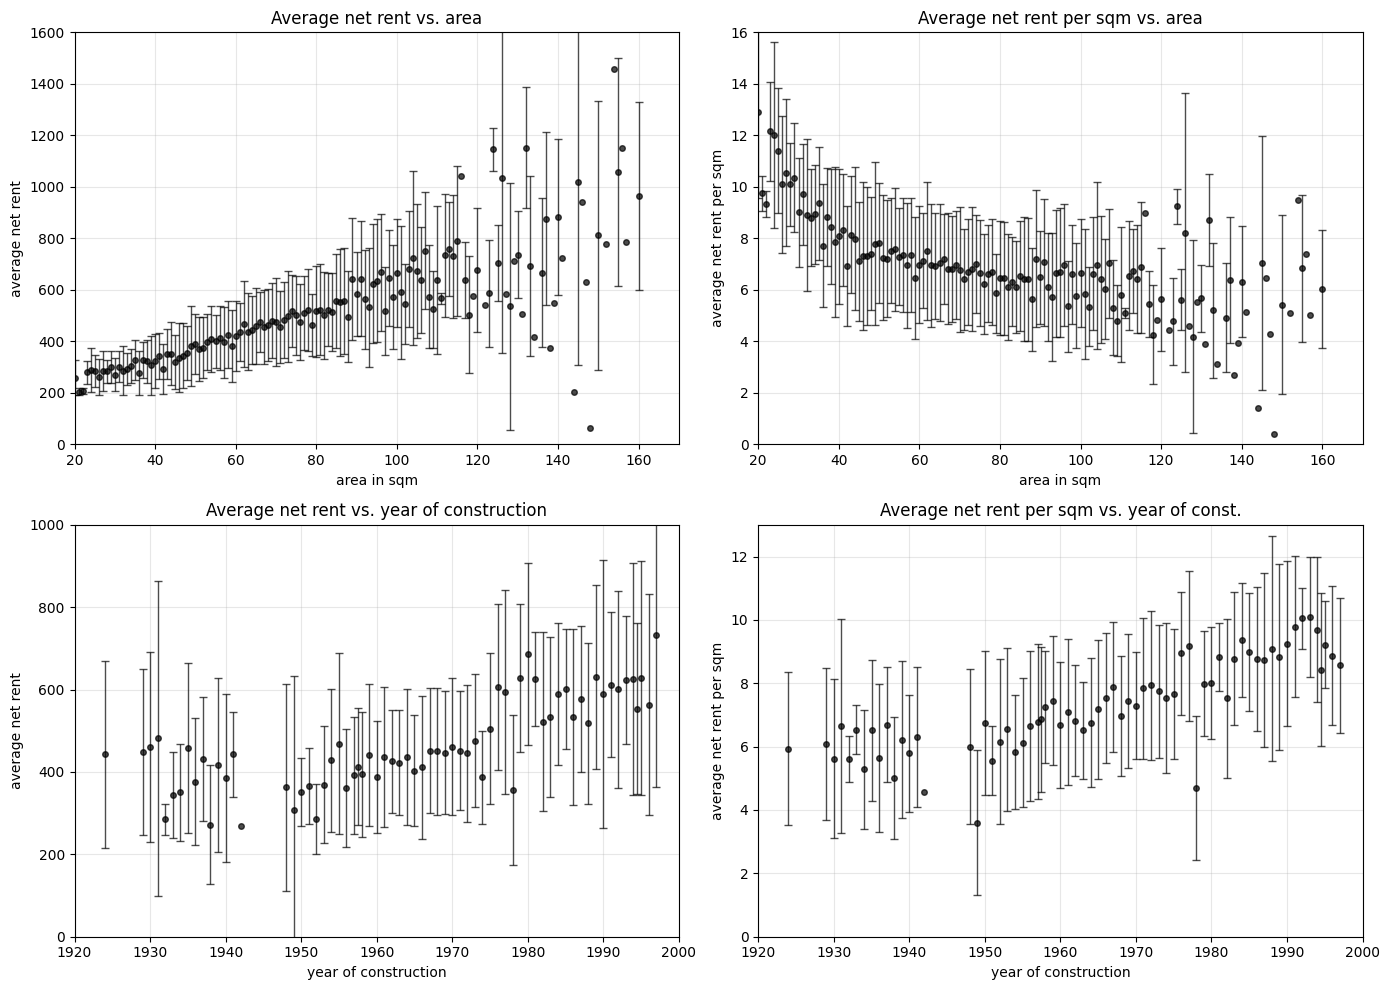

'\nResult: \nX-axis → Apartment size (sqm)\n\nY-axis → Average rent (euros)\n\nDots → Mean rent for each area\n\nVertical bars → Standard deviation (how much rents vary at that area size)\n'

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Average net rent vs. area
ax1 = axes[0, 0]
# Group by area and calculate mean and std
area_stats = rent99.groupby('area')['rent'].agg(['mean', 'std', 'count'])
area_stats = area_stats[area_stats['count'] >= 1]  # Filter groups with data
'''
This ensures we only include areas that have at least one data point 
(though here every area likely has ≥1, so it’s a safety check).
'''

ax1.errorbar(area_stats.index, area_stats['mean'], yerr=area_stats['std'], 
             fmt='o', color='black', markersize=4, capsize=3, 
             elinewidth=1, alpha=0.7)
ax1.set_xlabel('area in sqm')
ax1.set_ylabel('average net rent')
ax1.set_title('Average net rent vs. area')
ax1.set_ylim(0, 1600)
ax1.set_xlim(20, 170)
ax1.grid(True, alpha=0.3)

# 2. Average net rent per sqm vs. area
ax2 = axes[0, 1]
area_rentsqm_stats = rent99.groupby('area')['rentsqm'].agg(['mean', 'std', 'count'])
area_rentsqm_stats = area_rentsqm_stats[area_rentsqm_stats['count'] >= 1]

ax2.errorbar(area_rentsqm_stats.index, area_rentsqm_stats['mean'], 
             yerr=area_rentsqm_stats['std'], 
             fmt='o', color='black', markersize=4, capsize=3, 
             elinewidth=1, alpha=0.7)
ax2.set_xlabel('area in sqm')
ax2.set_ylabel('average net rent per sqm')
ax2.set_title('Average net rent per sqm vs. area')
ax2.set_ylim(0, 16)
ax2.set_xlim(20, 170)
ax2.grid(True, alpha=0.3)

# 3. Average net rent vs. year of construction
ax3 = axes[1, 0]
year_stats = rent99.groupby('yearc')['rent'].agg(['mean', 'std', 'count'])
year_stats = year_stats[year_stats['count'] >= 1]

ax3.errorbar(year_stats.index, year_stats['mean'], yerr=year_stats['std'], 
             fmt='o', color='black', markersize=4, capsize=3, 
             elinewidth=1, alpha=0.7)
ax3.set_xlabel('year of construction')
ax3.set_ylabel('average net rent')
ax3.set_title('Average net rent vs. year of construction')
ax3.set_ylim(0, 1000)
ax3.set_xlim(1920, 2000)
ax3.grid(True, alpha=0.3)

# 4. Average net rent per sqm vs. year of construction
ax4 = axes[1, 1]
year_rentsqm_stats = rent99.groupby('yearc')['rentsqm'].agg(['mean', 'std', 'count'])
year_rentsqm_stats = year_rentsqm_stats[year_rentsqm_stats['count'] >= 1]

ax4.errorbar(year_rentsqm_stats.index, year_rentsqm_stats['mean'], 
             yerr=year_rentsqm_stats['std'], 
             fmt='o', color='black', markersize=4, capsize=3, 
             elinewidth=1, alpha=0.7)
ax4.set_xlabel('year of construction')
ax4.set_ylabel('average net rent per sqm')
ax4.set_title('Average net rent per sqm vs. year of const.')
ax4.set_ylim(0, 13)
ax4.set_xlim(1920, 2000)
ax4.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

'''
Result: 
X-axis → Apartment size (sqm)

Y-axis → Average rent (euros)

Dots → Mean rent for each area

Vertical bars → Standard deviation (how much rents vary at that area size)
'''

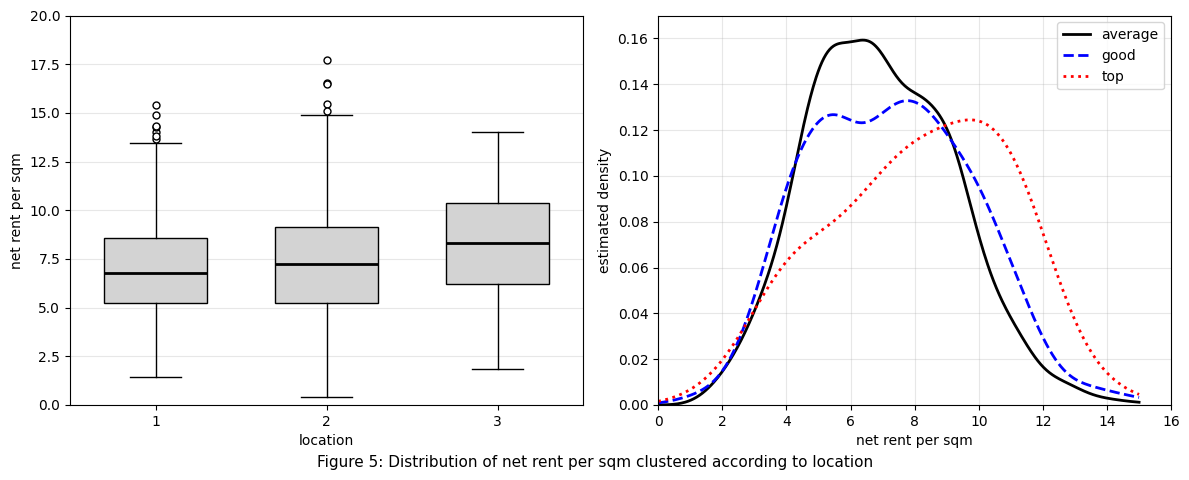

In [12]:
from scipy import stats

# Create figure with 1x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Box plot: net rent per sqm by location
ax1 = axes[0]

# Prepare data for boxplot - group by location
locations = sorted(rent99['location'].unique())
data_by_location = [rent99[rent99['location'] == loc]['rentsqm'].values 
                    for loc in locations]

# Create boxplot
bp = ax1.boxplot(data_by_location, positions=locations, widths=0.6,
                 patch_artist=True, showfliers=True,
                 boxprops=dict(facecolor='lightgray', color='black'),
                 medianprops=dict(color='black', linewidth=2),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'),
                 flierprops=dict(marker='o', markerfacecolor='white', 
                                markeredgecolor='black', markersize=5))

ax1.set_xlabel('location')
ax1.set_ylabel('net rent per sqm')
ax1.set_ylim(0, 20)
ax1.set_xticks(locations)
ax1.set_xticklabels(locations)
ax1.grid(True, alpha=0.3, axis='y')

# 2. Smooth density estimates by location
ax2 = axes[1]

# Define colors/styles for each location
location_labels = {1: 'average', 2: 'good', 3: 'top'}
line_styles = {1: '-', 2: '--', 3: ':'}
colors = {1: 'black', 2: 'blue', 3: 'red'}

# Create density plots for each location
x_range = np.linspace(0, 15, 500)

for loc in locations:
    data = rent99[rent99['location'] == loc]['rentsqm'].values
    
    # Calculate kernel density estimate
    kde = stats.gaussian_kde(data)
    density = kde(x_range)
    
    # Plot
    ax2.plot(x_range, density, 
             linestyle=line_styles[loc], 
             color=colors[loc],
             linewidth=2,
             label=location_labels[loc])

ax2.set_xlabel('net rent per sqm')
ax2.set_ylabel('estimated density')
ax2.set_xlim(0, 16)
ax2.set_ylim(0, 0.17)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Main title
fig.suptitle('Figure 5: Distribution of net rent per sqm clustered according to location',
             y=0.02, fontsize=11)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()


## Task 3: Fuel Consumption


In [13]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
# Import the alr4 package
alr4 = importr('alr4')

# Load the fuel2001 dataset
robjects.r('data(fuel2001)')
# Convert to pandas DataFrame using the new converter context
with localconverter(robjects.default_converter + pandas2ri.converter):
    fuel2001_df = robjects.conversion.get_conversion().rpy2py(robjects.r['fuel2001'])

print(fuel2001_df.head())
print(f"\nShape: {fuel2001_df.shape}")
print(f"\nColumns: {fuel2001_df.columns.tolist()}")
print(f"\nData types:\n{fuel2001_df.dtypes}")

     Drivers     FuelC  Income   Miles       MPC       Pop   Tax
AL   3559897   2382507   23471   94440  12737.00   3451586  18.0
AK    472211    235400   30064   13628   7639.16    457728   8.0
AZ   3550367   2428430   25578   55245   9411.55   3907526  18.0
AR   1961883   1358174   22257   98132  11268.40   2072622  21.7
CA  21623793  14691753   32275  168771   8923.89  25599275  18.0

Shape: (51, 7)

Columns: ['Drivers', 'FuelC', 'Income', 'Miles', 'MPC', 'Pop', 'Tax']

Data types:
Drivers      int32
FuelC        int32
Income       int32
Miles        int32
MPC        float64
Pop          int32
Tax        float64
dtype: object


### a/. Create 3 more following variables and add to the fuel data consumption

In [14]:
# Fuel: 1000 * Drivers/Pop
fuel2001_df['Fuel'] = 1000 * fuel2001_df['FuelC'] / fuel2001_df['Pop']

#Dlic: 1000 × Drivers/Pop
fuel2001_df['Dlic'] = 1000 * fuel2001_df['Drivers'] / fuel2001_df['Pop']

#log(Miles): natural logarithm of Miles
fuel2001_df['log_Miles'] = np.log(fuel2001_df['Miles'])

print("\n" + "="*60)
print("NEW VARIABLES CREATED")
print("="*60)
print(f"Fuel: Fuel consumption per 1000 population")
print(f"Dlic: Drivers per 1000 population")
print(f"log_Miles: Natural log of Miles")
print("\nUpdated Dataset Shape:", fuel2001_df.shape)
print("\nNew variables summary:")
print(fuel2001_df[['Fuel', 'Dlic', 'log_Miles']].describe())


NEW VARIABLES CREATED
Fuel: Fuel consumption per 1000 population
Dlic: Drivers per 1000 population
log_Miles: Natural log of Miles

Updated Dataset Shape: (51, 10)

New variables summary:
             Fuel         Dlic  log_Miles
count   51.000000    51.000000  51.000000
mean   227.673734   303.274075  10.913714
std    452.982250   578.930057   1.030512
min   -667.011103  -796.174181   7.335634
25%    -91.760803  -138.669174  10.507358
50%    426.349370   113.173514  11.276114
75%    627.225941   916.434514  11.633615
max    842.791752  1075.288202  12.614091


### b. Based on the goal of the task

In [15]:
# Define response variable
# Based on the context, 'Fuel' (fuel consumption per capita) is likely the response variable
response_var = 'Fuel' #response variable : y
predictor_vars = ['Dlic', 'log_Miles', 'Tax', 'Income'] #predictor variables : x

In [16]:
# Study the overview of each variable by using initial descriptive 
print("MISSING VALUES CHECK")
print("="*60)
print(fuel2001_df.isnull().sum())
print(fuel2001_df.describe())

MISSING VALUES CHECK
Drivers      0
FuelC        0
Income       0
Miles        0
MPC          0
Pop          0
Tax          0
Fuel         0
Dlic         0
log_Miles    0
dtype: int64
            Drivers         FuelC        Income          Miles           MPC  \
count  5.100000e+01  5.100000e+01     51.000000      51.000000     51.000000   
mean   3.750504e+06  2.542786e+06  28403.901961   77418.588235  10448.281765   
std    3.991156e+06  2.697368e+06   4451.637224   52983.429444   2039.597617   
min    3.280940e+05  1.487690e+05  20993.000000    1534.000000   6555.940000   
25%    1.087128e+06  7.373610e+05  25323.000000   36586.000000   9391.420000   
50%    2.718209e+06  2.048664e+06  27871.000000   78914.000000  10458.400000   
75%    4.424256e+06  3.039932e+06  31208.500000  112827.500000  11310.850000   
max    2.162379e+07  1.469175e+07  40640.000000  300767.000000  17494.900000   

                Pop        Tax        Fuel         Dlic  log_Miles  
count  5.100000e+01  51.00

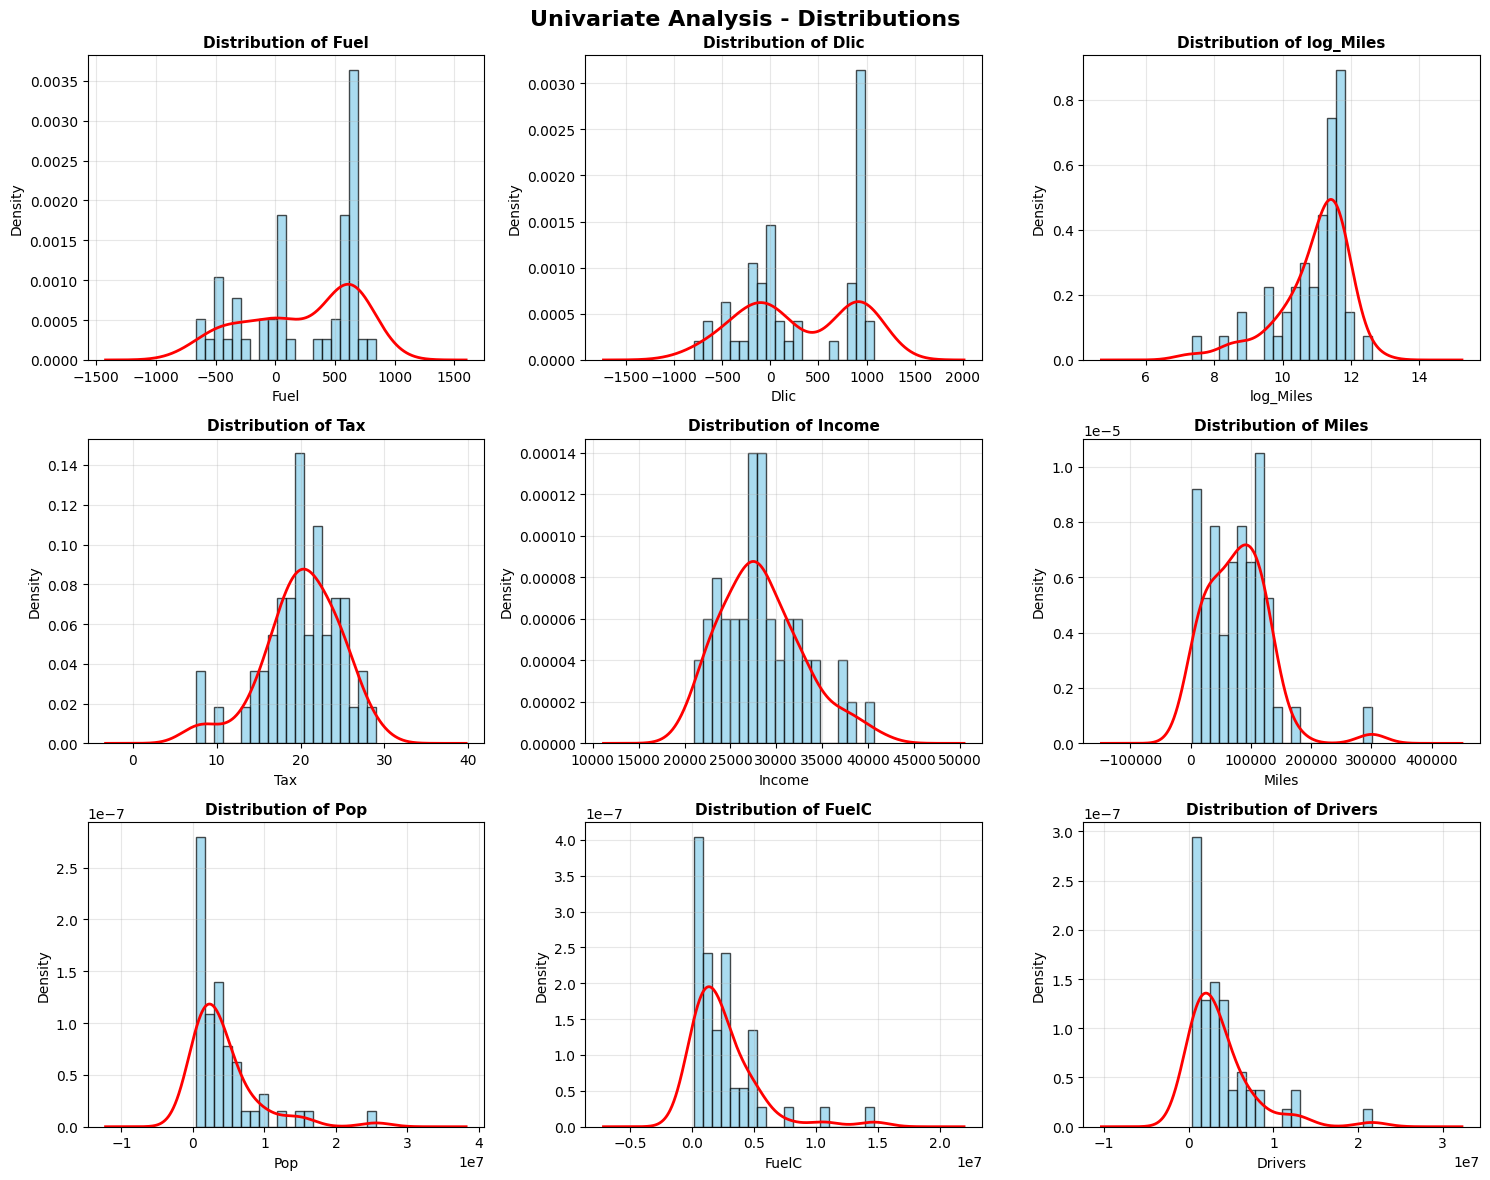

In [17]:
#  Univariate Analysis - Graphical
'''
Graphical univariate analysis uses charts to visually study a single variable, helping to
 understand its distribution, central tendency, and spread.
'''

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Univariate Analysis - Distributions', fontsize=16, fontweight='bold')

variables = ['Fuel', 'Dlic', 'log_Miles', 'Tax', 'Income', 'Miles', 'Pop', 'FuelC', 'Drivers']

for idx, var in enumerate(variables):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Histogram with KDE
    ax.hist(fuel2001_df[var], bins=20, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    fuel2001_df[var].plot(kind='kde', ax=ax, color='red', linewidth=2)
    ax.set_xlabel(var, fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.set_title(f'Distribution of {var}', fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3)

plt.tight_layout()
# plt.savefig('univariate_distributions.png', dpi=300, bbox_inches='tight')
plt.show()



CORRELATION MATRIX
               Fuel      Dlic  log_Miles       Tax    Income
Fuel       1.000000  0.634476  -0.285580  0.162865 -0.171858
Dlic       0.634476  1.000000  -0.421150  0.105997 -0.238153
log_Miles -0.285580 -0.421150   1.000000 -0.043737 -0.295851
Tax        0.162865  0.105997  -0.043737  1.000000 -0.010685
Income    -0.171858 -0.238153  -0.295851 -0.010685  1.000000


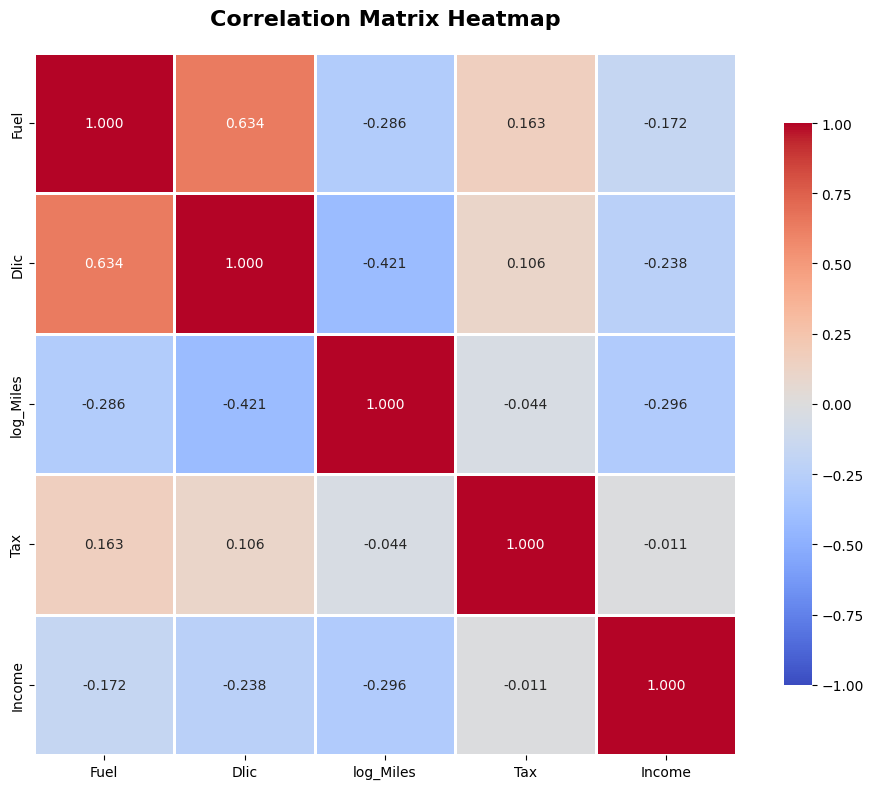

In [18]:
# Correlation Matrix and Heatmap
print("\n" + "="*60)
print("CORRELATION MATRIX")
print("="*60)

# Select relevant variables for correlation
corr_vars = ['Fuel', 'Dlic', 'log_Miles', 'Tax', 'Income']
correlation_matrix = fuel2001_df[corr_vars].corr()
print(correlation_matrix)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
# plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

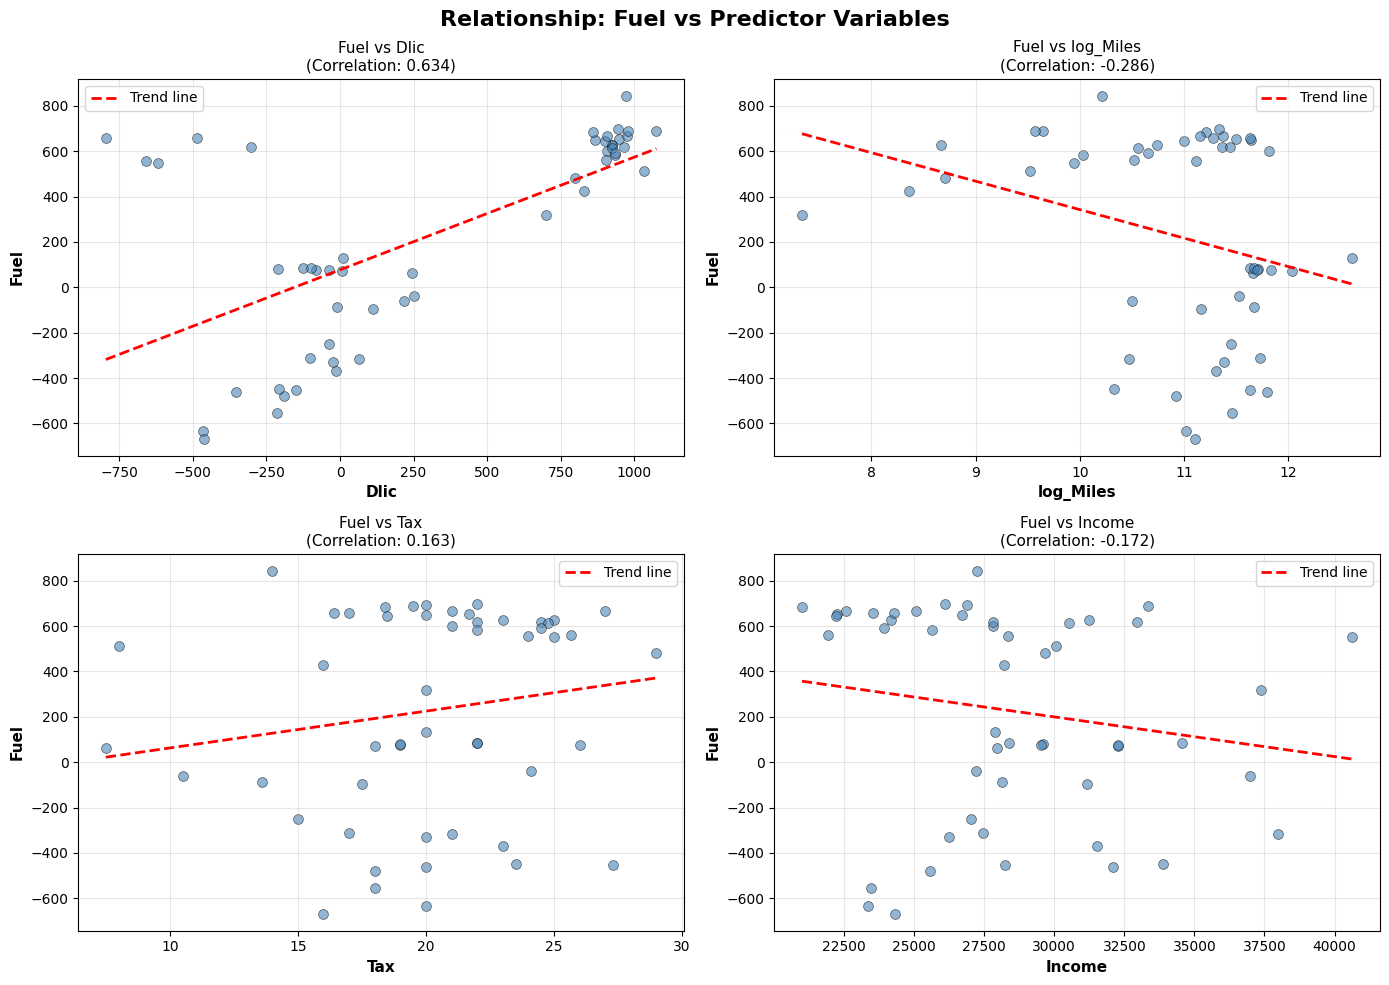

In [19]:
#  Response vs Predictors - Scatter plots

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Relationship: {response_var} vs Predictor Variables', 
             fontsize=16, fontweight='bold')

predictors = ['Dlic', 'log_Miles', 'Tax', 'Income']

for idx, pred in enumerate(predictors):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Scatter plot
    ax.scatter(fuel2001_df[pred], fuel2001_df[response_var], 
               alpha=0.6, s=50, color='steelblue', edgecolors='black', linewidth=0.5)
    
    # Add regression line
    z = np.polyfit(fuel2001_df[pred], 
                   fuel2001_df[response_var], 1)
    p = np.poly1d(z)
    x_line = np.linspace(fuel2001_df[pred].min(), fuel2001_df[pred].max(), 100)
    ax.plot(x_line, p(x_line), "r--", linewidth=2, label=f'Trend line')
    
    # Calculate correlation
    corr = fuel2001_df[[pred, response_var]].corr().iloc[0, 1]
    '''
        Computes the Pearson correlation between the predictor and response.

        Value range:

        +1 → strong positive correlation

        0 → no correlation

        -1 → strong negative correlation
    '''

    ax.set_xlabel(pred, fontsize=11, fontweight='bold')
    ax.set_ylabel(response_var, fontsize=11, fontweight='bold')
    ax.set_title(f'{response_var} vs {pred}\n(Correlation: {corr:.3f})', 
                 fontsize=11)
    ax.grid(alpha=0.3)
    ax.legend()

plt.tight_layout()
# plt.savefig('response_vs_predictors.png', dpi=300, bbox_inches='tight')
plt.show()


# Section 2

In [20]:
# Load the nassCDS dataset from R
daag = importr('DAAG')
robjects.r('data(nassCDS)')

with localconverter(robjects.default_converter + pandas2ri.converter):
    nassCDS = robjects.conversion.get_conversion().rpy2py(robjects.r['nassCDS'])

print("Dataset Shape:", nassCDS.shape)
print("\nColumn Names:", nassCDS.columns.tolist())
print("\nFirst few rows:")
print(nassCDS.head())
print("\nDataset Info:")
print(nassCDS.info())

Dataset Shape: (26217, 15)

Column Names: ['dvcat', 'weight', 'dead', 'airbag', 'seatbelt', 'frontal', 'sex', 'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole', 'deploy', 'injSeverity', 'caseid']

First few rows:
   dvcat   weight   dead  airbag seatbelt  frontal sex  ageOFocc  yearacc  \
1  25-39   25.069  alive    none   belted      1.0   f      26.0   1997.0   
2  10-24   25.069  alive  airbag   belted      1.0   f      72.0   1997.0   
3  10-24   32.379  alive    none     none      1.0   f      69.0   1997.0   
4  25-39  495.444  alive  airbag   belted      1.0   f      53.0   1997.0   
5  25-39   25.069  alive    none   belted      1.0   f      32.0   1997.0   

   yearVeh    abcat occRole  deploy  injSeverity  caseid  
1   1990.0  unavail  driver     0.0          3.0   2:3:1  
2   1995.0   deploy  driver     1.0          1.0   2:3:2  
3   1988.0  unavail  driver     0.0          4.0   2:5:1  
4   1995.0   deploy  driver     1.0          1.0  2:10:1  
5   1988.0  unavail  drive

## Q1

In [21]:
#1

seatbelt_user = nassCDS[nassCDS['seatbelt'] == 'belted'].shape[0]
seatbelt_user

18573

In [22]:
#2
'''
pd.crosstab() is a Pandas function used to compute a cross-tabulation 
— basically a frequency table that counts how often combinations of two
 (or more) categories occur.

It’s similar to a “pivot table” for categorical data.
'''


contingency_table = pd.crosstab(nassCDS['seatbelt'],#This is the first variable — typically used as the rows of the table.
                                 nassCDS['dead'], 
                                 margins=True, margins_name='Total')
contingency_table


dead,alive,dead,Total
seatbelt,,,
none,6964,680,7644
belted,18073,500,18573
Total,25037,1180,26217


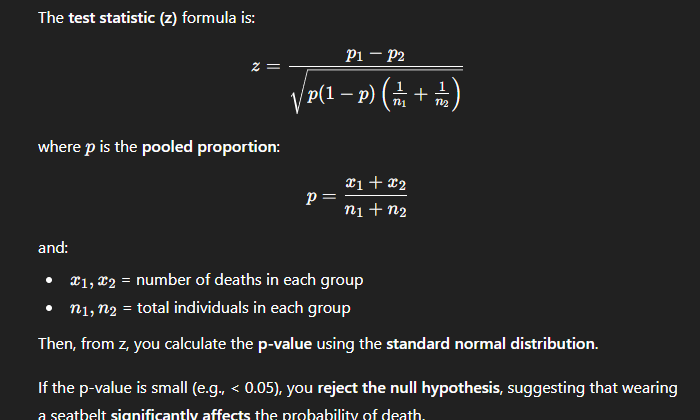

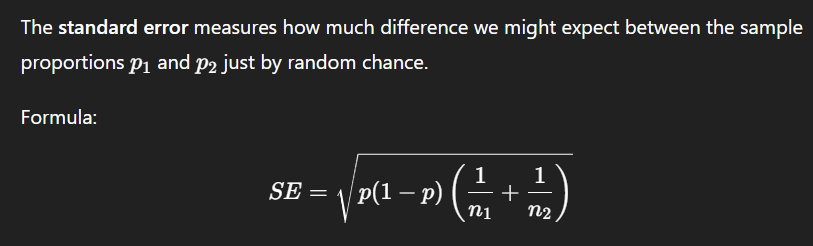

In [23]:
#3

def test_two_proportions(contingency_table_2x2):
    """
    Test for equality of proportions in two independent populations.
    H0: p1 = p2 (no difference between proportions)
    Ha: p1 ≠ p2 (two-sided alternative)
    
    Input: 2x2 contingency table (without margins)
    Output: test statistic and p-value
    """
    # Remove margins if present,If the user accidentally included margins (totals) when creating the table, this code removes them to keep only the main 2×2 data.
    if 'Total' in contingency_table_2x2.index:
        table = contingency_table_2x2.drop('Total', axis=0).drop('Total', axis=1)
    else:
        table = contingency_table_2x2
    
    # Extract values
    # Row 0: belted, Row 1: none
    # Col 0: alive, Col 1: dead
    n1_success = table.iloc[0, 1]  # belted & dead
    n1_total = table.iloc[0, :].sum()  # total belted
    
    n2_success = table.iloc[1, 1]  # none & dead
    n2_total = table.iloc[1, :].sum()  # total none
    
    p1 = n1_success / n1_total
    p2 = n2_success / n2_total
    
    # Pooled proportion
    p_pooled = (n1_success + n2_success) / (n1_total + n2_total)
    
    # Standard error
    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n1_total + 1/n2_total))
    
    # Z test statistic
    z_stat = (p1 - p2) / se
    
    # Two-sided p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    '''
        stats.norm.cdf() gives the probability of observing a 
        z-statistic less than a given value under the standard normal distribution.
        abs(z_stat) is used because this is a two-sided test (difference could be positive or negative).
    '''
    
    print(f"\n    Proportion of deaths (belted): {p1:.4f}")
    print(f"    Proportion of deaths (none): {p2:.4f}")
    print(f"    Pooled proportion: {p_pooled:.4f}")
    print(f"    Test statistic (Z): {z_stat:.4f}")
    print(f"    P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"    Conclusion: Reject H0 at α=0.05. Proportions are significantly different.")
    else:
        print(f"    Conclusion: Fail to reject H0 at α=0.05. No significant difference.")
    
    return z_stat, p_value

print("\n1.3. Two-Proportion Z-Test:")
contingency_2x2 = pd.crosstab(nassCDS['seatbelt'], nassCDS['dead'])
print(contingency_2x2)
z_stat, p_val = test_two_proportions(contingency_2x2)


1.3. Two-Proportion Z-Test:
dead      alive  dead
seatbelt             
none       6964   680
belted    18073   500

    Proportion of deaths (belted): 0.0890
    Proportion of deaths (none): 0.0269
    Pooled proportion: 0.0450
    Test statistic (Z): 22.0200
    P-value: 0.0000
    Conclusion: Reject H0 at α=0.05. Proportions are significantly different.


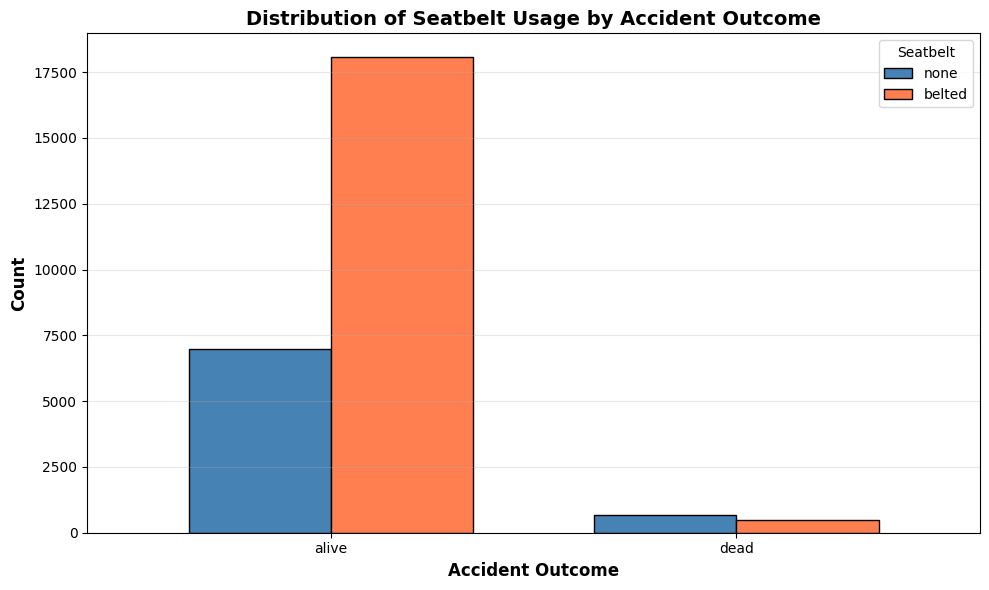

In [24]:
#4 

fig, ax = plt.subplots(figsize=(10, 6))
contingency_plot = pd.crosstab(nassCDS['dead'], nassCDS['seatbelt'])
contingency_plot.plot(kind='bar', ax=ax, color=['steelblue', 'coral'], 
                       edgecolor='black', width=0.7)
ax.set_xlabel('Accident Outcome', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Seatbelt Usage by Accident Outcome', 
             fontsize=14, fontweight='bold')
ax.legend(title='Seatbelt', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
# plt.savefig('q1_seatbelt_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Q2

In [25]:
#1

age_stats = nassCDS.groupby('dead')['ageOFocc'].agg(['mean', 'std'])
'''
nassCDS.groupby('dead')->group the dataset based on the variable dead
['ageOFocc']->This selects the column ageOFocc, which represents the age of the occupant.
.agg() -> apply one or more summary functions to each group.
'''
print("\n2.1. Mean and Standard Deviation of Age by Accident Outcome:")
print(age_stats)


2.1. Mean and Standard Deviation of Age by Accident Outcome:
            mean        std
dead                       
alive  36.857012  17.656205
dead   44.615254  21.322384


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17228\3052674278.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = nassCDS.groupby('dead')['ageOFocc'].agg(['mean', 'std'])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17228\926424288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=nassCDS, x='dead', y='ageOFocc', ax=ax,


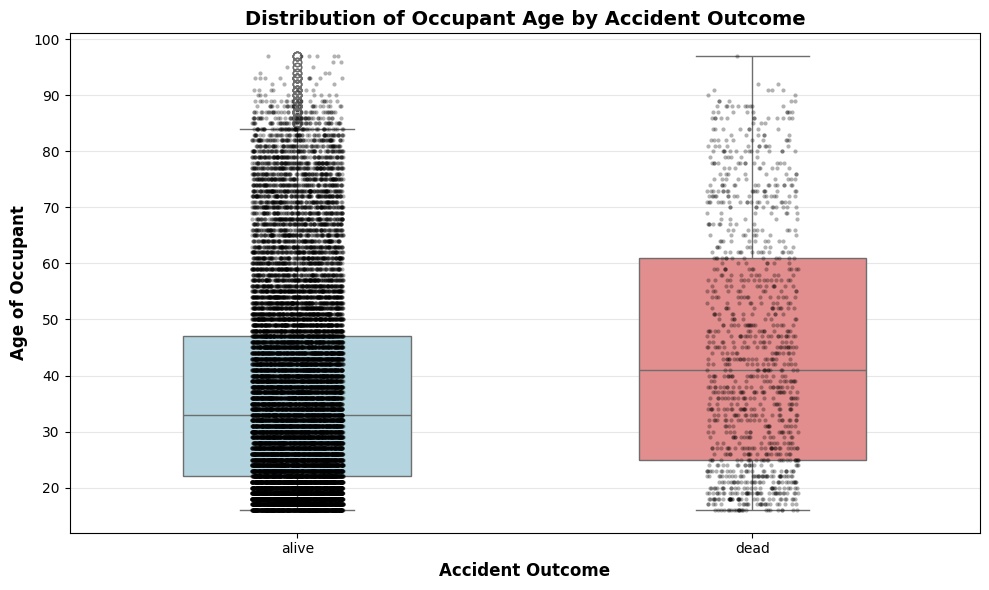

In [26]:
# 2.

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=nassCDS, x='dead', y='ageOFocc', ax=ax, 
            palette=['lightblue', 'lightcoral'], width=0.5)
sns.stripplot(data=nassCDS, x='dead', y='ageOFocc', ax=ax, 
              color='black', alpha=0.3, size=3)
'''
A stripplot plots individual data points (small dots) on top of the boxplot.
This helps you see the actual distribution instead of just summary statistics.
'''
ax.set_xlabel('Accident Outcome', fontsize=12, fontweight='bold')
ax.set_ylabel('Age of Occupant', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Occupant Age by Accident Outcome', 
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
# plt.savefig('q2_age_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

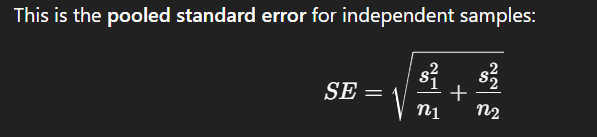

In [27]:
#3


alive_ages = nassCDS[nassCDS['dead'] == 'alive']['ageOFocc'].dropna()
dead_ages = nassCDS[nassCDS['dead'] == 'dead']['ageOFocc'].dropna()

mean_diff = dead_ages.mean() - alive_ages.mean()
n1, n2 = len(alive_ages), len(dead_ages)
var1, var2 = alive_ages.var(ddof=1), dead_ages.var(ddof=1)
'''
mean_diff: the observed difference in mean age between dead and alive.
If positive → dead people are older on average.
n1, n2: sample sizes of each group.
var1, var2: sample variances (using ddof=1 for unbiased sample variance).
'''


# Pooled standard error
se_diff = np.sqrt(var1/n1 + var2/n2)

# Degrees of freedom (Welch-Satterthwaite)
df = ((var1/n1 + var2/n2)**2) / ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))
'''
the two groups might have unequal variances, we use the Welch’s t-test 
formula to approximate the degrees of freedom (df).
This gives a more accurate CI when variances or sample sizes diffe
'''

# 95% CI
t_critical = stats.t.ppf(0.975, df)#95% CI, we use 1−α/2=0.975 (two-tailed).
ci_lower = mean_diff - t_critical * se_diff
ci_upper = mean_diff + t_critical * se_diff

print(f"\n2.3. 95% Confidence Interval for Mean Difference (Dead - Alive):")
print(f"    Mean difference: {mean_diff:.4f}")
print(f"    95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")


2.3. 95% Confidence Interval for Mean Difference (Dead - Alive):
    Mean difference: 7.7582
    95% CI: [6.5210, 8.9955]


# Q3

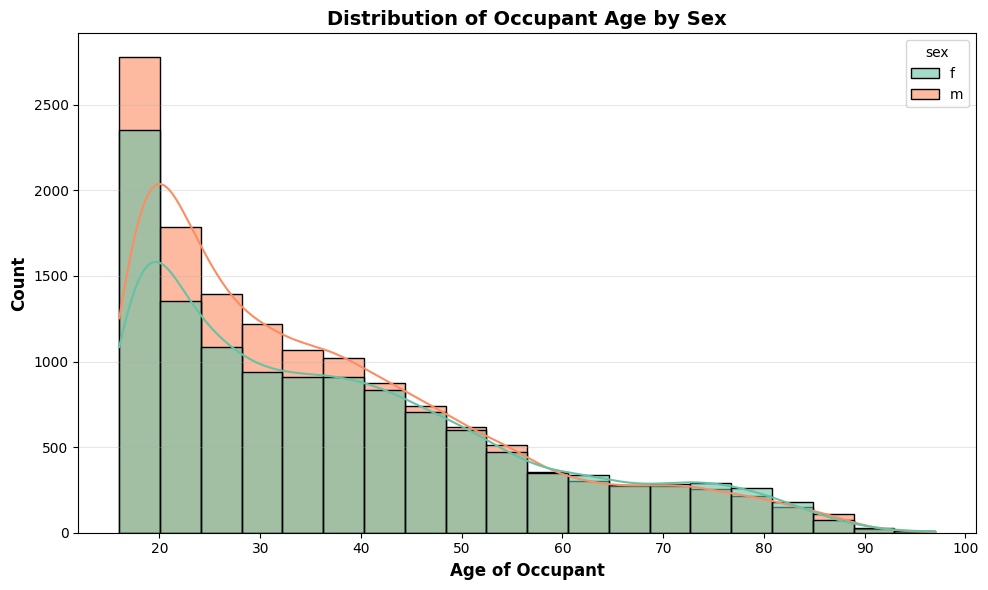

In [ ]:
#1.

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=nassCDS, x='ageOFocc', hue='sex',
             bins=20, kde=True, palette='Set2', alpha=0.6, ax=ax)
'''
hue='sex' → Separate histograms for each sex, with different colors.
palette='Set2' → Nice contrasting colors for male/female.
'''

ax.set_xlabel('Age of Occupant', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Occupant Age by Sex',
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


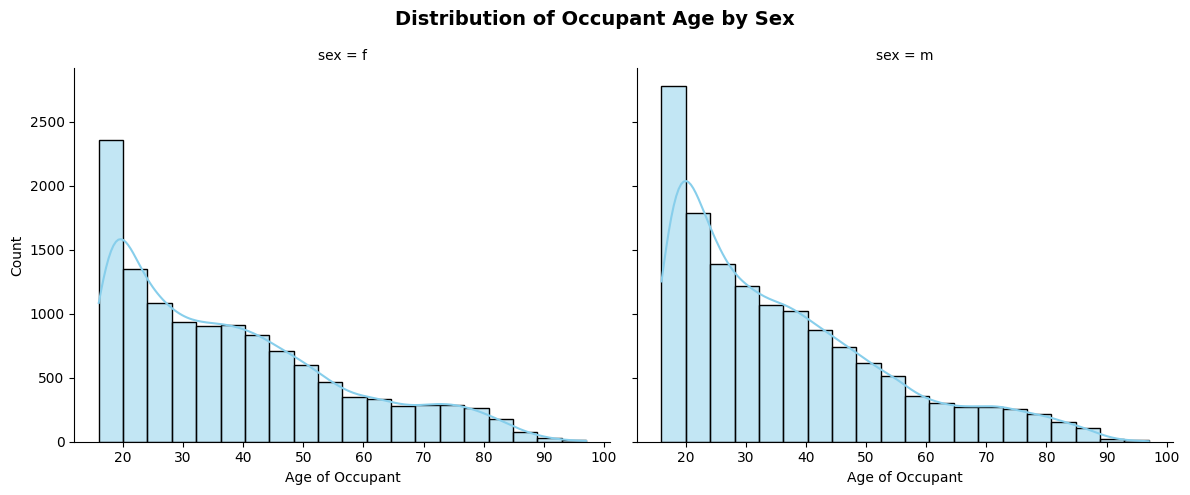

In [29]:
g = sns.FacetGrid(nassCDS, col='sex', height=5, aspect=1.2)
g.map_dataframe(sns.histplot, x='ageOFocc', bins=20, color='skyblue', kde=True)
g.set_axis_labels('Age of Occupant', 'Count')
g.fig.suptitle('Distribution of Occupant Age by Sex', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [35]:
#2.

over_50_survived = nassCDS[(nassCDS['ageOFocc'] > 50) & 
                            (nassCDS['dead'] == 'alive')].shape[0]
print(f"\nNumber of occupants over 50 who survived: {over_50_survived}")


Number of occupants over 50 who survived: 5174


In [ ]:
#3.

nassCDS['AgeOFocc_class'] = (nassCDS['ageOFocc'] > 50).astype(int)
'''
.astype(int)->Converts the Boolean values (True/False) into integers:
True → 1
False → 0
'''
print(f"    Value counts:\n{nassCDS['AgeOFocc_class'].value_counts()}")

    Value counts:
AgeOFocc_class
0    20619
1     5598
Name: count, dtype: int64


In [39]:
#4.

nassCDS_o50 = nassCDS[nassCDS['ageOFocc'] > 50][['dead', 'airbag', 'weight', 'injSeverity']].dropna()
nassCDS_o50.shape

(5573, 4)

In [41]:
# 5.

print(f"Dimension of nassCDS_o50: {nassCDS_o50.shape}")

Dimension of nassCDS_o50: (5573, 4)


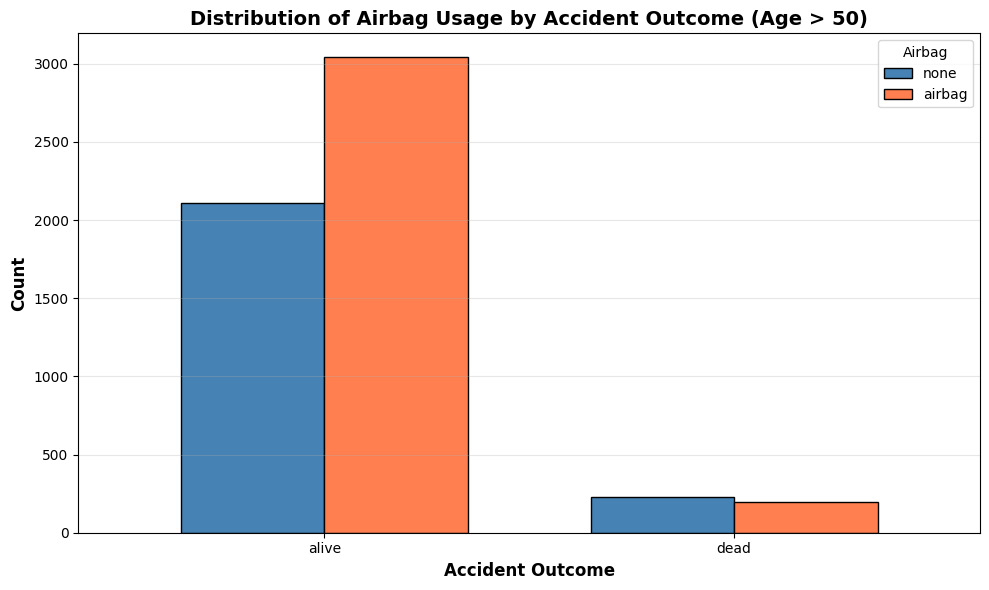

In [42]:
# 6.

fig, ax = plt.subplots(figsize=(10, 6))
airbag_dead = pd.crosstab(nassCDS_o50['dead'], nassCDS_o50['airbag'])
airbag_dead.plot(kind='bar', ax=ax, color=['steelblue', 'coral'], 
                 edgecolor='black', width=0.7)
ax.set_xlabel('Accident Outcome', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Airbag Usage by Accident Outcome (Age > 50)', 
             fontsize=14, fontweight='bold')
ax.legend(title='Airbag', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
# plt.savefig('q3_airbag_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

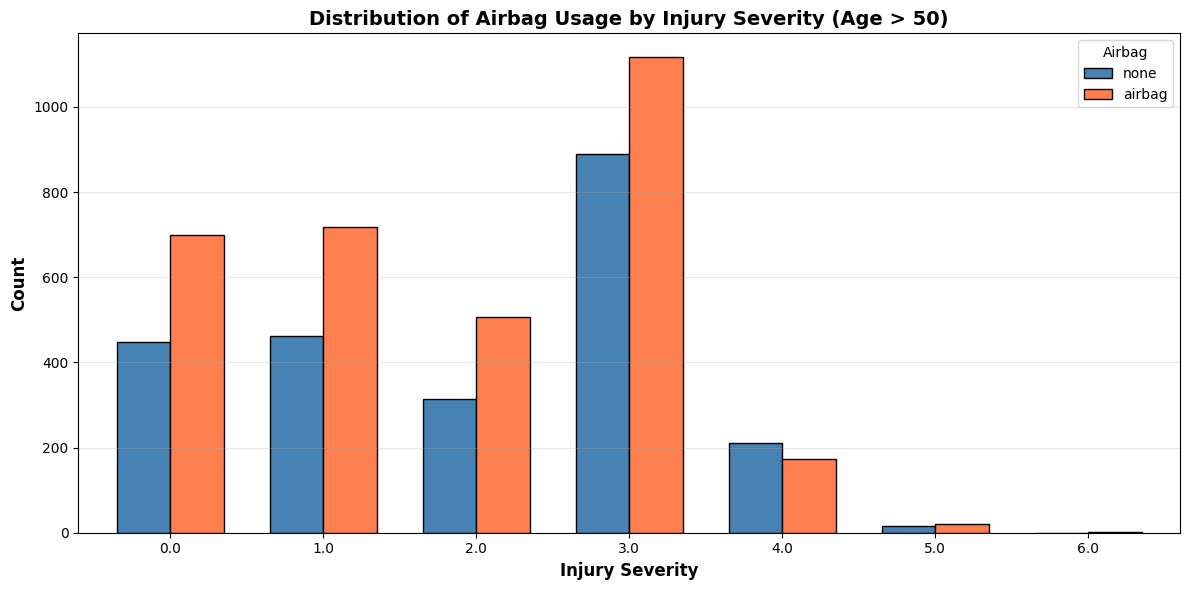

In [43]:
#7.

fig, ax = plt.subplots(figsize=(12, 6))
airbag_severity = pd.crosstab(nassCDS_o50['injSeverity'], nassCDS_o50['airbag'])
airbag_severity.plot(kind='bar', ax=ax, color=['steelblue', 'coral'], 
                     edgecolor='black', width=0.7)
ax.set_xlabel('Injury Severity', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Airbag Usage by Injury Severity (Age > 50)', 
             fontsize=14, fontweight='bold')
ax.legend(title='Airbag', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
# plt.savefig('q3_airbag_severity.png', dpi=300, bbox_inches='tight')
plt.show()

# Q4


4. Death Analysis Results:
                             Metric Value
           Percentage of Deaths (%)  4.50
Percentage Females Among Deaths (%) 39.32
  Percentage Males Among Deaths (%) 60.68
      Most Frequent Injury Severity   4.0
                        Minimum Age    16
                        Maximum Age    97


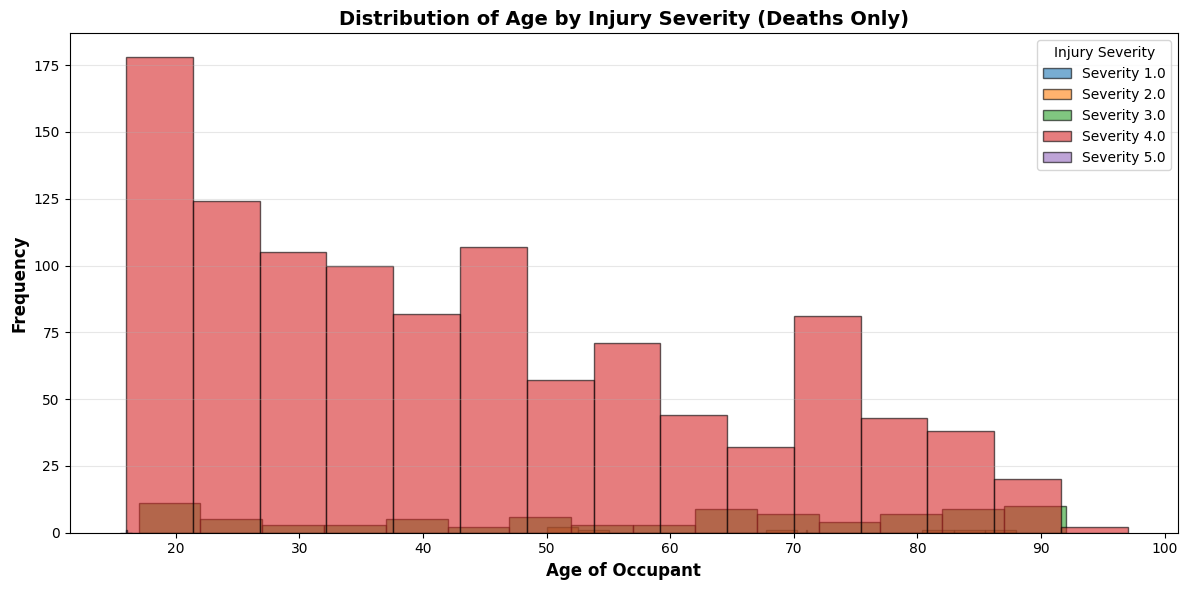

In [30]:
def analyze_deaths(data):
    """
    Comprehensive analysis of deaths in nassCDS dataset
    
    Returns:
        - DataFrame with numerical results
        - Histogram plot
    """
    # 4.1: Select only dead observations
    dead_data = data[data['dead'] == 'dead'].copy()
    
    # 4.2: Percentage of deaths
    total_obs = len(data)
    total_deaths = len(dead_data)
    pct_deaths = (total_deaths / total_obs) * 100
    
    # 4.3: Percentage of females and males among deaths
    sex_counts = dead_data['sex'].value_counts()
    pct_female = (sex_counts.get('f', 0) / total_deaths) * 100
    pct_male = (sex_counts.get('m', 0) / total_deaths) * 100
    
    # 4.4: Most frequent injury severity
    most_freq_severity = dead_data['injSeverity'].mode()[0]
    
    # 4.5: Min and max age
    min_age = dead_data['ageOFocc'].min()
    max_age = dead_data['ageOFocc'].max()
    
    # Create results table
    results_df = pd.DataFrame({
        'Metric': ['Percentage of Deaths (%)', 
                   'Percentage Females Among Deaths (%)', 
                   'Percentage Males Among Deaths (%)',
                   'Most Frequent Injury Severity',
                   'Minimum Age',
                   'Maximum Age'],
        'Value': [f'{pct_deaths:.2f}', 
                  f'{pct_female:.2f}', 
                  f'{pct_male:.2f}',
                  most_freq_severity,
                  f'{min_age:.0f}',
                  f'{max_age:.0f}']
    })
    
    # 4.6: Histogram - Age by Injury Severity
    fig, ax = plt.subplots(figsize=(12, 6))
    
    dead_clean = dead_data.dropna(subset=['injSeverity', 'ageOFocc'])
    severities = sorted(dead_clean['injSeverity'].unique())
    
    for severity in severities:
        subset = dead_clean[dead_clean['injSeverity'] == severity]['ageOFocc']
        ax.hist(subset, alpha=0.6, label=f'Severity {severity}', bins=15, edgecolor='black')
    
    ax.set_xlabel('Age of Occupant', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.set_title('Distribution of Age by Injury Severity (Deaths Only)', 
                 fontsize=14, fontweight='bold')
    ax.legend(title='Injury Severity', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    
    return results_df, fig

# Apply the function
results_table, death_histogram = analyze_deaths(nassCDS)

print("\n4. Death Analysis Results:")
print(results_table.to_string(index=False))
plt.show()

# Q5

In [ ]:
#1

seatbelt_df = nassCDS[nassCDS['seatbelt'] == 'belted'].copy()
seatbelt_df.shape, nassCDS.shape

((18573, 16), (26217, 16))

In [50]:
#2

print(f"Number of occupants who used seatbelt: {len(seatbelt_df)}")

Number of occupants who used seatbelt: 18573


In [51]:
#3.

seatbelt_outcome = seatbelt_df['dead'].value_counts()
print(f"Accident outcomes among seatbelt users:{seatbelt_outcome}")

Accident outcomes among seatbelt users:dead
alive    18073
dead       500
Name: count, dtype: int64


In [66]:
#5.

seatbelt_sorted = seatbelt_df.sort_values(by=['injSeverity', 'ageOFocc'], 
                                          ascending=[True, True])
print(f"Dataframe sorted by injury severity and age")
print(seatbelt_sorted[['injSeverity', 'ageOFocc', 'dead', 'weight']].dropna().head(10))

Dataframe sorted by injury severity and age
      injSeverity  ageOFocc   dead    weight
32            0.0      16.0  alive   745.351
477           0.0      16.0  alive    18.361
682           0.0      16.0  alive    99.996
1028          0.0      16.0  alive    72.388
1029          0.0      16.0  alive    72.388
1033          0.0      16.0  alive  1054.928
1046          0.0      16.0  alive  1648.787
1068          0.0      16.0  alive    49.775
1077          0.0      16.0  alive   241.148
1112          0.0      16.0  alive   378.095


In [67]:
#6.

top_25_weight = seatbelt_df.nlargest(25, 'weight')
print(f"Top 25 occupants by weight:")
print(top_25_weight[['injSeverity', 'ageOFocc', 'dead', 'weight']].dropna())

Top 25 occupants by weight:
       injSeverity  ageOFocc   dead     weight
6844           2.0      59.0  alive  57871.595
6888           0.0      16.0  alive  57871.595
6889           0.0      16.0  alive  57871.595
2630           0.0      24.0  alive  47463.090
25422          0.0      33.0  alive  31694.040
25423          0.0      47.0  alive  31694.040
10596          0.0      19.0  alive  29533.134
24332          1.0      23.0  alive  29301.140
10572          0.0      43.0  alive  28281.109
20993          0.0      35.0  alive  28215.770
20994          1.0      37.0  alive  28215.770
11092          3.0      30.0  alive  26789.338
10538          0.0      34.0  alive  25988.014
2507           0.0      36.0  alive  25688.371
19732          0.0      31.0  alive  25029.200
19733          0.0      37.0  alive  25029.200
19704          3.0      31.0  alive  23428.610
15682          2.0      18.0  alive  23131.141
15683          0.0      42.0  alive  23131.141
15684          0.0      43.0  al

# Q6

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17228\1234627980.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_subset, x='injSeverity', y='ageOFocc', ax=ax1,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17228\1234627980.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_subset, x='injSeverity', y='ageOFocc', ax=ax2,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17228\1234627980.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_subset, x='injSeverity', y='ageOFocc', ax=ax3,
C:\Users\ASUS\AppData\Local\Temp\ipyk

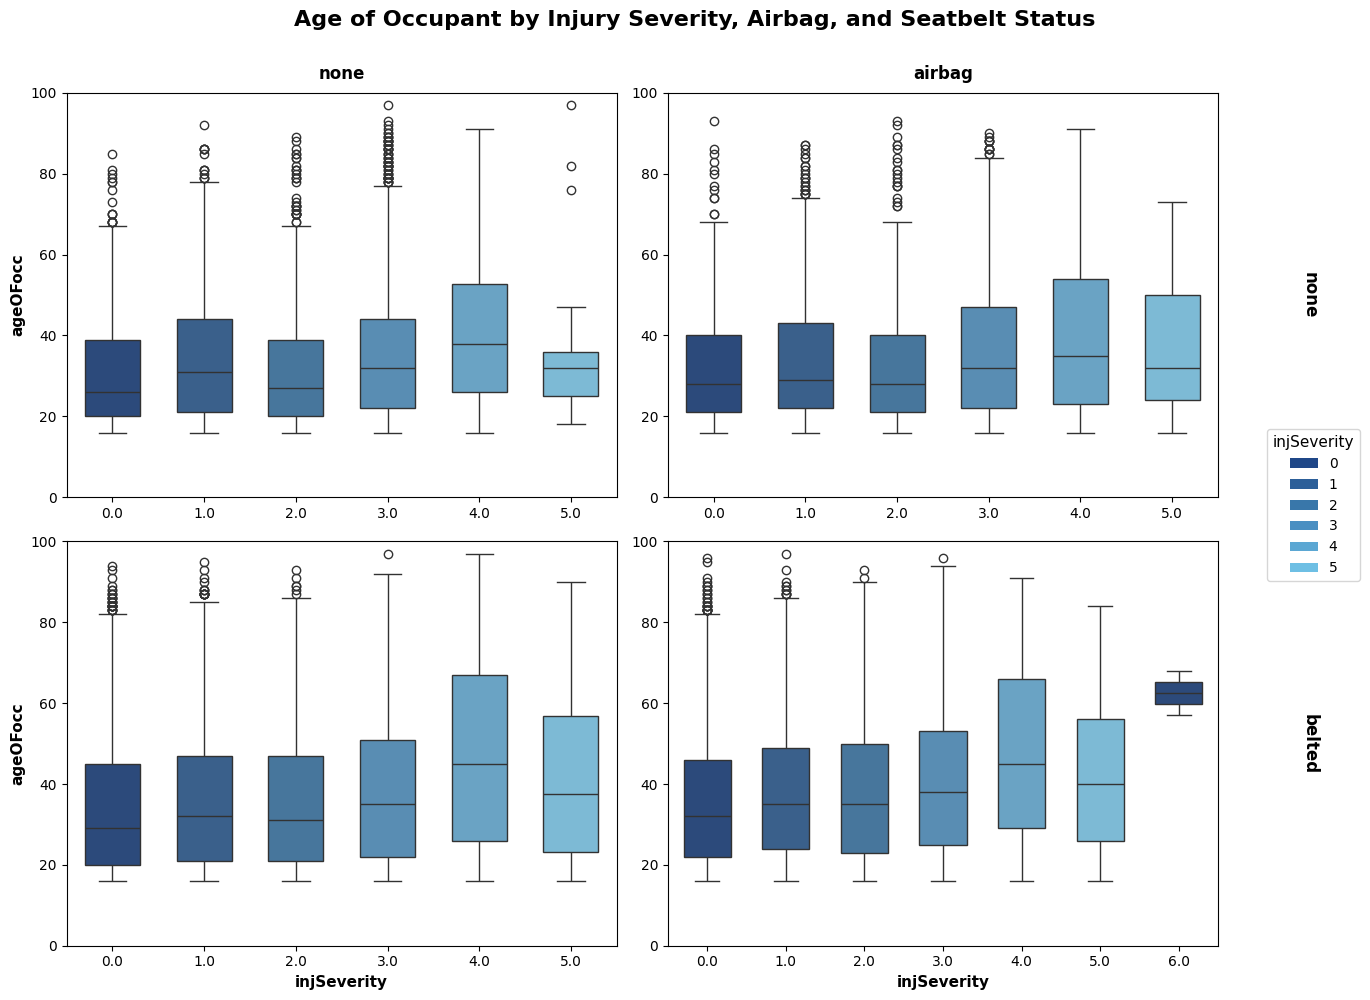

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Age of Occupant by Injury Severity, Airbag, and Seatbelt Status', 
             fontsize=16, fontweight='bold', y=0.995)

# Define color palette for injury severity
colors = ['#1f4788', '#2c5f99', '#3977aa', '#4a8fc2', '#5ba7d3', '#6ebfe4']

# Filter data
plot_data = nassCDS.dropna(subset=['ageOFocc', 'injSeverity', 'airbag', 'seatbelt'])

# Top-left: none seatbelt, no airbag
ax1 = axes[0, 0]
data_subset = plot_data[(plot_data['seatbelt'] == 'none') & (plot_data['airbag'] == 'none')]
sns.boxplot(data=data_subset, x='injSeverity', y='ageOFocc', ax=ax1, 
            palette=colors, width=0.6)
ax1.set_title('none', fontsize=12, fontweight='bold', pad=10)
ax1.set_xlabel('')
ax1.set_ylabel('ageOFocc', fontsize=11, fontweight='bold')
ax1.set_ylim(0, 100)

# Top-right: airbag, no seatbelt
ax2 = axes[0, 1]
data_subset = plot_data[(plot_data['seatbelt'] == 'none') & (plot_data['airbag'] == 'airbag')]
sns.boxplot(data=data_subset, x='injSeverity', y='ageOFocc', ax=ax2, 
            palette=colors, width=0.6)
ax2.set_title('airbag', fontsize=12, fontweight='bold', pad=10)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_ylim(0, 100)

# Add right label "none"
ax2.text(1.15, 0.5, 'none', transform=ax2.transAxes, 
         fontsize=12, fontweight='bold', rotation=270, va='center')

# Bottom-left: belted, no airbag
ax3 = axes[1, 0]
data_subset = plot_data[(plot_data['seatbelt'] == 'belted') & (plot_data['airbag'] == 'none')]
sns.boxplot(data=data_subset, x='injSeverity', y='ageOFocc', ax=ax3, 
            palette=colors, width=0.6)
ax3.set_xlabel('injSeverity', fontsize=11, fontweight='bold')
ax3.set_ylabel('ageOFocc', fontsize=11, fontweight='bold')
ax3.set_ylim(0, 100)

# Bottom-right: belted, airbag
ax4 = axes[1, 1]
data_subset = plot_data[(plot_data['seatbelt'] == 'belted') & (plot_data['airbag'] == 'airbag')]
sns.boxplot(data=data_subset, x='injSeverity', y='ageOFocc', ax=ax4, 
            palette=colors, width=0.6)
ax4.set_xlabel('injSeverity', fontsize=11, fontweight='bold')
ax4.set_ylabel('')
ax4.set_ylim(0, 100)

# Add right label "belted"
ax4.text(1.15, 0.5, 'belted', transform=ax4.transAxes, 
         fontsize=12, fontweight='bold', rotation=270, va='center')

# Add color legend for injury severity
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=str(i)) 
                   for i in range(len(colors))]
fig.legend(legend_elements, [str(i) for i in range(len(colors))], 
           title='injSeverity', loc='center right', bbox_to_anchor=(0.98, 0.5),
           fontsize=10, title_fontsize=11)

plt.tight_layout(rect=[0, 0, 0.95, 0.99])
# plt.savefig('q6_reproduction_figure.png', dpi=300, bbox_inches='tight')
plt.show()